PROBABILISTIC FACTOR PROFILES ANALYSIS
✅ Loaded probabilistic factors shape: (3, 43)
PROBABILISTIC FACTOR PROFILE STATISTICS

Factor_1:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.003 (0=uniform, 1=focused)
  Dominant species: m/Q 31 (0.033)
  Min contribution: 0.018281
  Max contribution: 0.032756

Factor_2:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.017 (0=uniform, 1=focused)
  Dominant species: m/Q 50 (0.038)
  Min contribution: 0.010942
  Max contribution: 0.038038

Factor_3:
  Sum: 1.000000 (should be ~1.0)
  Concentration: 0.012 (0=uniform, 1=focused)
  Dominant species: m/Q 74 (0.040)
  Min contribution: 0.012093
  Max contribution: 0.040349

Overall Statistics:
  All factors sum to 1.0: True
  Average concentration: 0.011


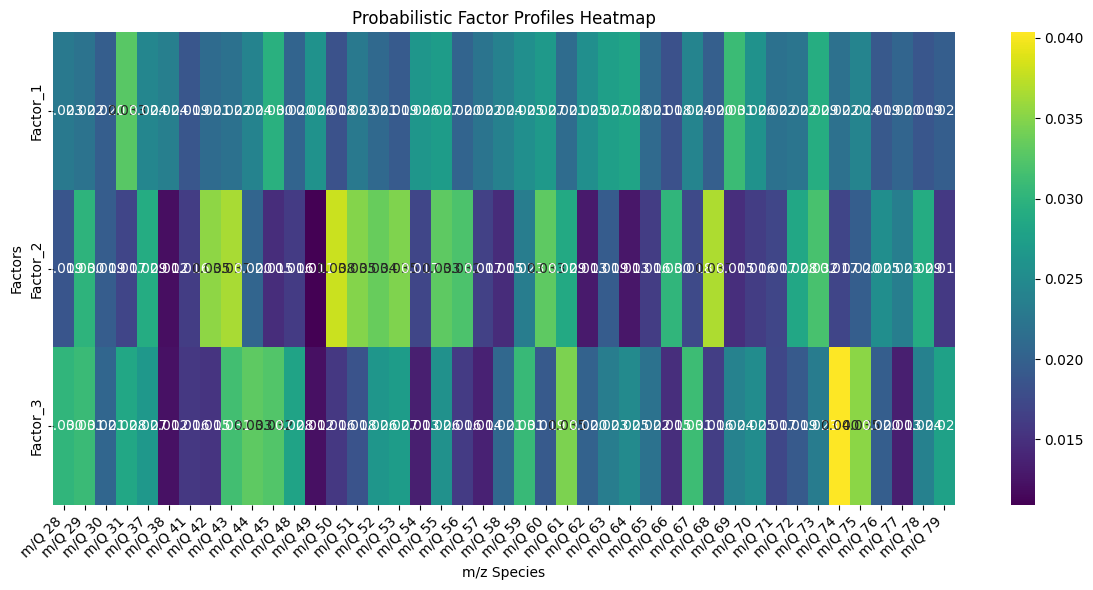

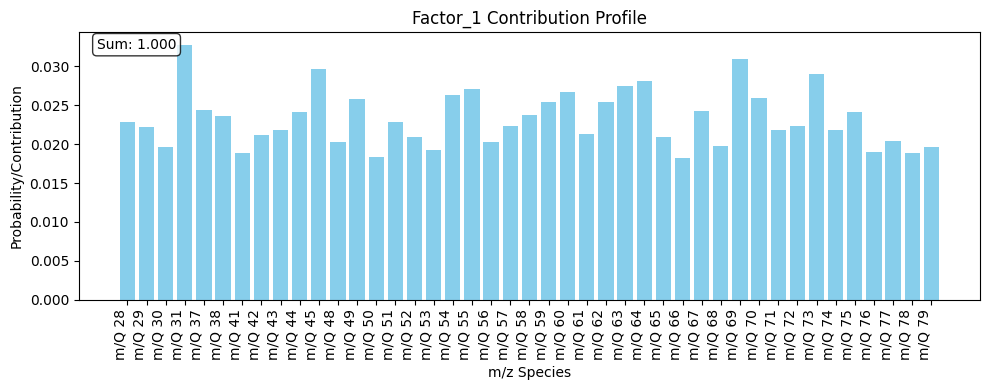

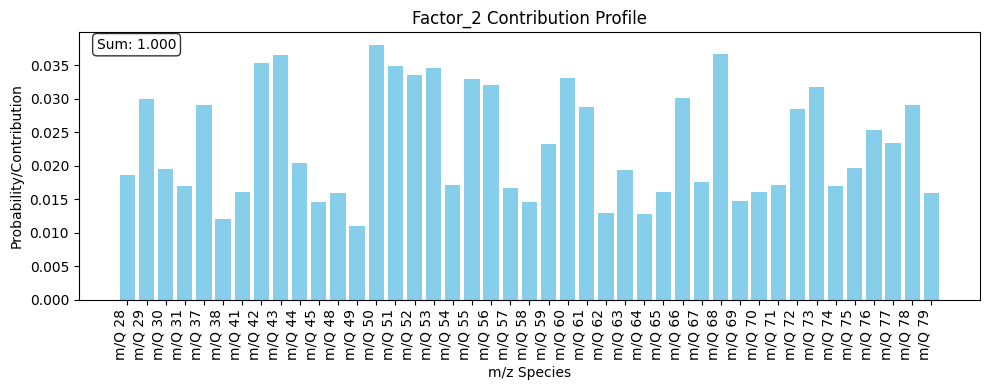

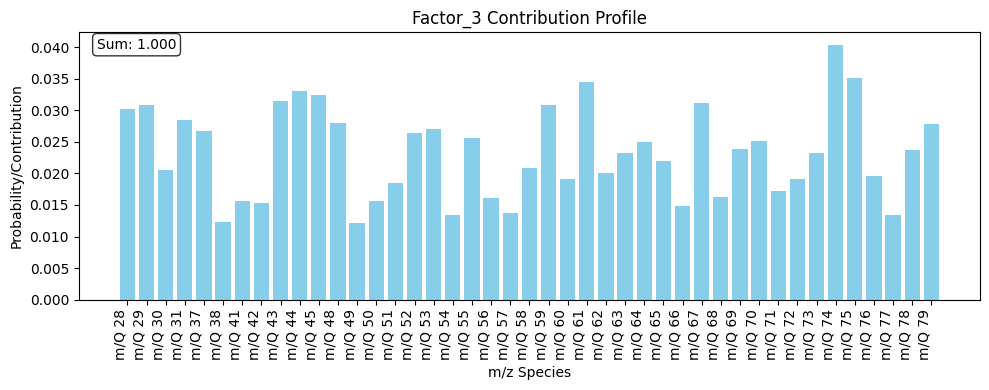

In [2]:
# In test.ipynb - Updated for Probabilistic Factor Profiles

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import importlib

# Force reload the visualization module to get the latest version
if 'src.visualisation' in sys.modules:
    importlib.reload(sys.modules['src.visualisation'])

# Import your visualization functions
from src.visualisation import (
    plot_weight_heatmap, 
    plot_bar_chart_for_factor, 
    plot_comparison, 
    plot_difference_and_ratio,
    load_and_plot_probabilistic_factors
)

# ============================================================================
# NEW: Load and Visualize Probabilistic Factor Profiles
# ============================================================================

print("=" * 80)
print("PROBABILISTIC FACTOR PROFILES ANALYSIS")
print("=" * 80)

# Load the new probabilistic factor profiles
try:
    probabilistic_factors = np.load('saved_models/probabilistic_factors.npy')
    print(f"✅ Loaded probabilistic factors shape: {probabilistic_factors.shape}")
    
    # Use the new probabilistic factor visualization function
    # This will dynamically extract feature names from the CSV file
    load_and_plot_probabilistic_factors(
        factors_path='saved_models/probabilistic_factors.npy',
        data_csv='data/raw/Spectra_Abhin_reduced.csv',
        plot_heatmap=True,
        plot_bars=True,
        plot_statistics=True
    )
    
except FileNotFoundError:
    print("❌ Probabilistic factors not found. Using legacy linear weights...")
    
    # Fallback to legacy linear weights
    W_loaded = np.load('saved_models/linear_weights.npy')
    print("Loaded legacy weight matrix shape:", W_loaded.shape)
    
    # Dynamically extract feature names from CSV (excluding 'Time' column)
    df = pd.read_csv('data/raw/Spectra_Abhin_reduced.csv')
    feature_names = [col for col in df.columns.tolist() if col != 'Time']
    
    # Construct labels based on the number of factors (rows) in W_loaded
    factor_labels = [f'Factor {i+1}' for i in range(W_loaded.shape[0])]
    
    # Use legacy visualization
    plot_weight_heatmap(W_loaded, feature_names, factor_labels, 
                       title="Legacy Linear Weights Heatmap")
    
    # Plot bar charts for each factor
    for i in range(W_loaded.shape[0]):
        plot_bar_chart_for_factor(W_loaded[i, :], feature_names, f"Factor {i+1} Contribution Profile")


🔬 NMF vs Probabilistic Factor Profiles Comparison
Data shape: (15301, 43)
Features: 43 m/z species

Performing NMF with 3 components...
NMF W shape: (15301, 3) (mixing matrix)
NMF H shape: (3, 43) (factor profiles)
✅ Loaded probabilistic factors shape: (3, 43)

FACTOR PROFILE COMPARISON


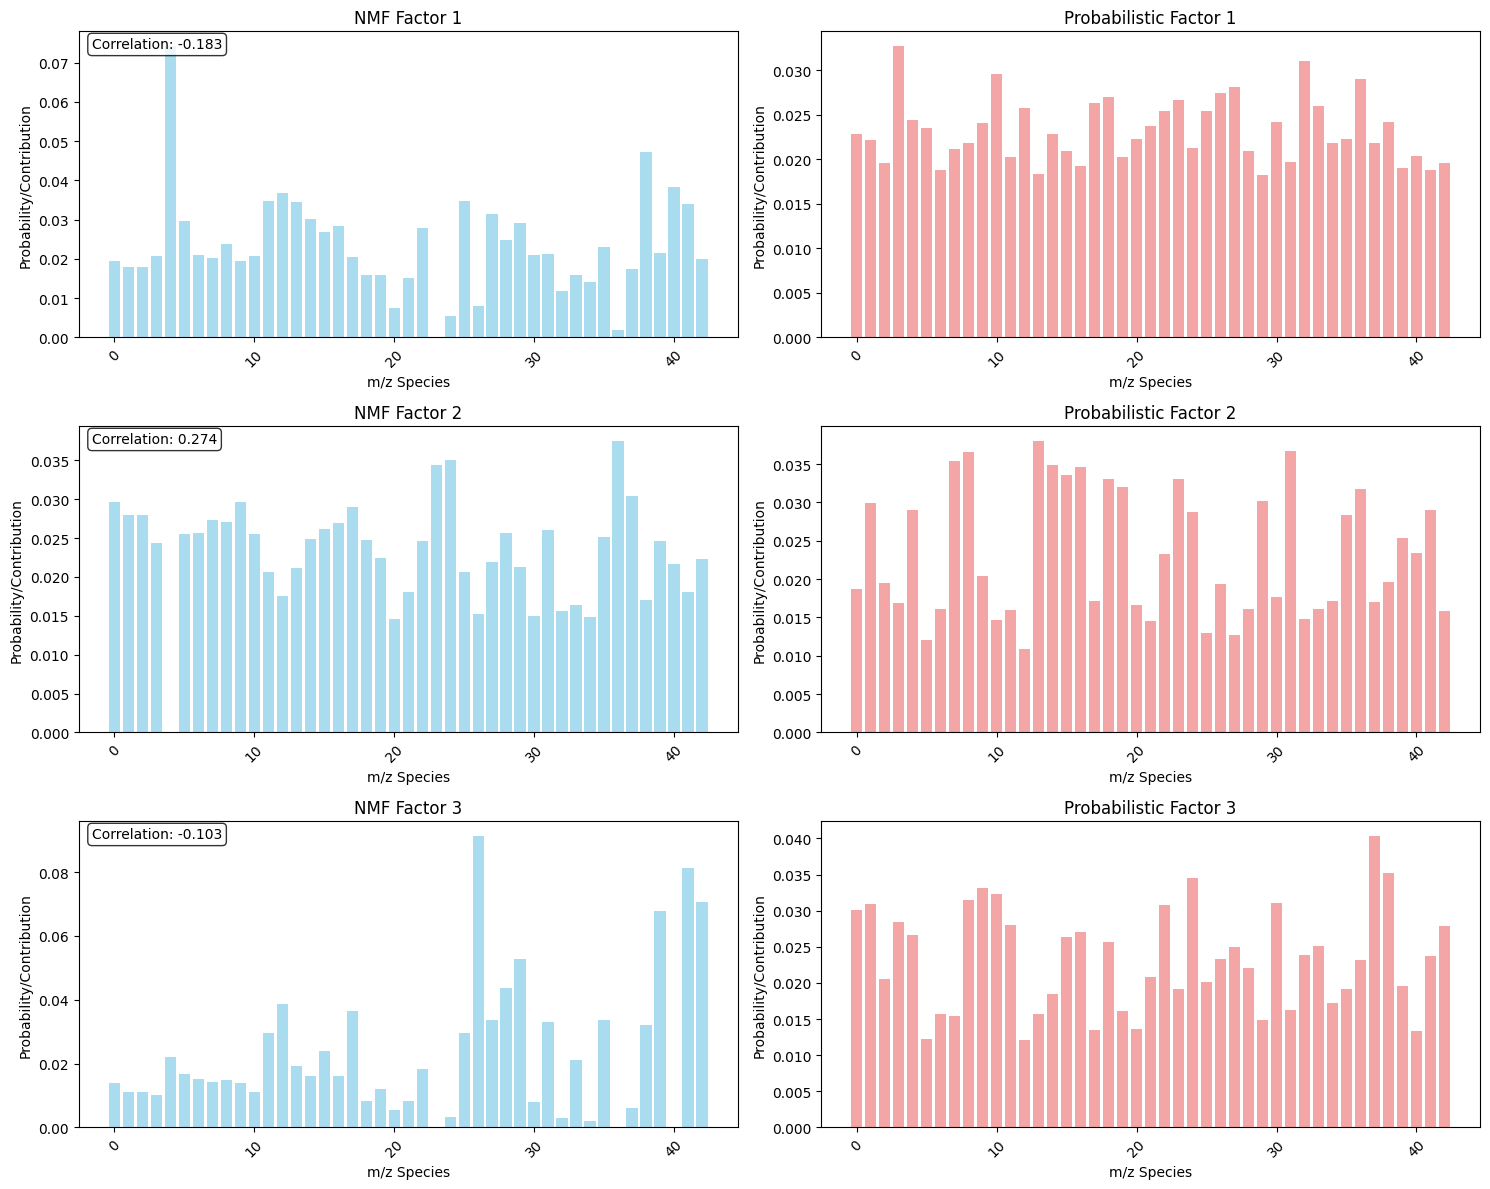


QUANTITATIVE COMPARISON METRICS
     Factor  Pearson_Correlation  Spearman_Correlation  Cosine_Similarity  \
0  Factor_1              -0.1825               -0.2415             0.8568   
1  Factor_2               0.2736                0.3470             0.9318   
2  Factor_3              -0.1034               -0.1349             0.6818   

   KL_Divergence_NMF_to_Prob  KL_Divergence_Prob_to_NMF  Max_Difference  \
0                     0.1712                     0.5448          0.0498   
1                     0.0879                     0.4586          0.0290   
2                     0.4521                     1.1712          0.0680   

   Mean_Absolute_Difference  
0                    0.0100  
1                    0.0074  
2                    0.0179  

SUMMARY STATISTICS:
Average Pearson Correlation: -0.0041
Average Cosine Similarity: 0.8235
Average KL Divergence (NMF→Prob): 0.2371
Average KL Divergence (Prob→NMF): 0.7249

HEATMAP COMPARISON


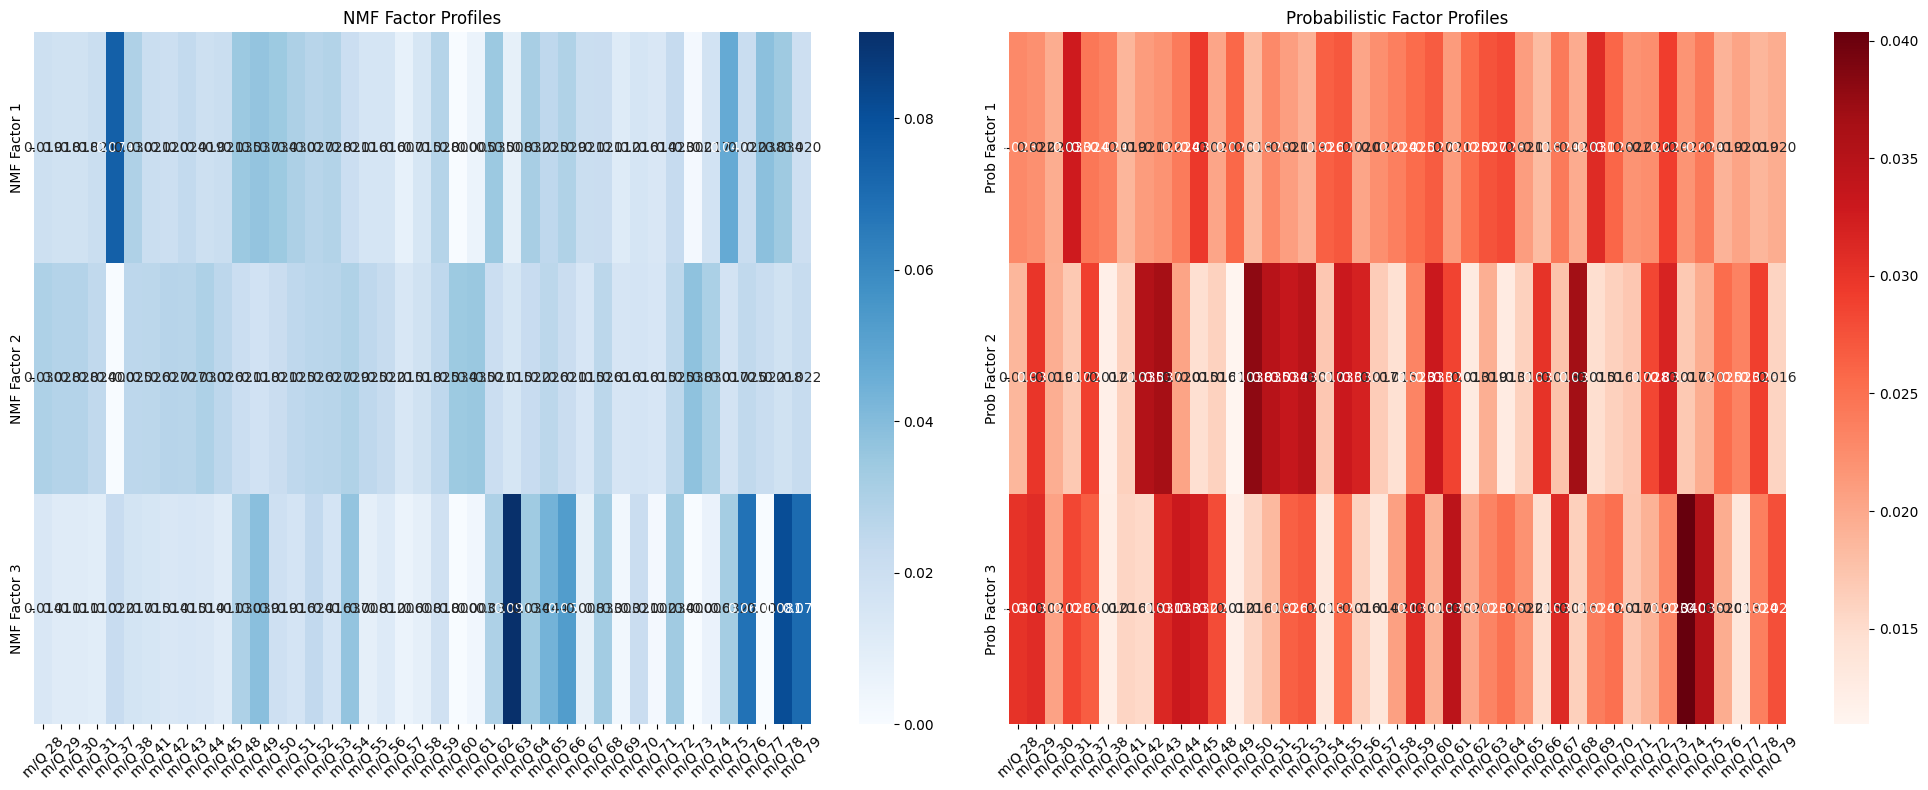


DIFFERENCE ANALYSIS


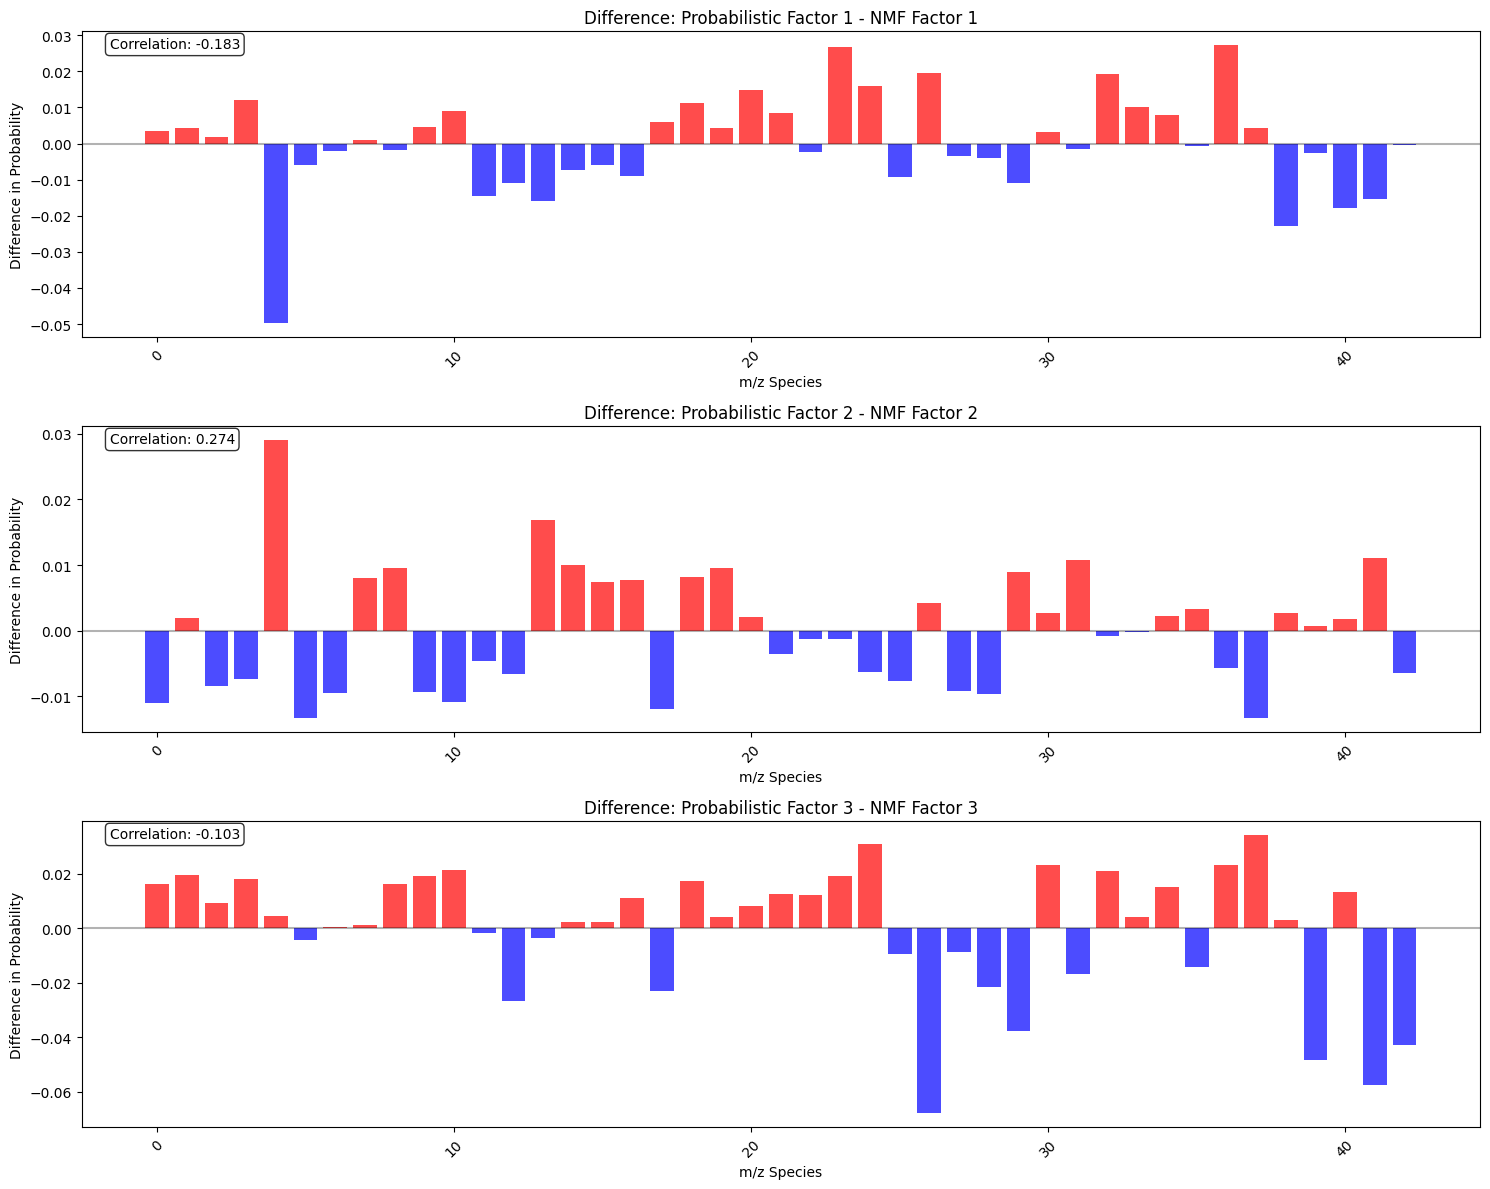


TOP 10 SPECIES COMPARISON

Factor 1:
  NMF_Species  NMF_Contribution Prob_Species  Prob_Contribution
0      m/Q 37            0.0742       m/Q 31             0.0328
1      m/Q 75            0.0471       m/Q 69             0.0310
2      m/Q 77            0.0384       m/Q 45             0.0296
3      m/Q 49            0.0367       m/Q 73             0.0291
4      m/Q 62            0.0348       m/Q 64             0.0282
5      m/Q 48            0.0348       m/Q 63             0.0275
6      m/Q 50            0.0344       m/Q 55             0.0270
7      m/Q 78            0.0341       m/Q 60             0.0267
8      m/Q 64            0.0315       m/Q 54             0.0264
9      m/Q 51            0.0303       m/Q 70             0.0259
Species overlap in top 10: 1/10 (10.0%)

Factor 2:
  NMF_Species  NMF_Contribution Prob_Species  Prob_Contribution
0      m/Q 73            0.0375       m/Q 50             0.0380
1      m/Q 61            0.0350       m/Q 68             0.0367
2      m/Q 60  

In [ ]:
# ============================================================================
# NMF vs Probabilistic Factor Profiles Comparison
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import cosine
import warnings
warnings.filterwarnings('ignore')

def load_data():
    """Load and preprocess the ACSM data"""
    df = pd.read_csv('data/raw/Spectra_Abhin_reduced.csv')
    
    # Extract feature columns (m/z species)
    feature_cols = [col for col in df.columns if col.startswith('m/Q')]
    X = df[feature_cols].values
    
    # Remove any rows with NaN or infinite values
    mask = np.isfinite(X).all(axis=1)
    X = X[mask]
    
    print(f"Data shape: {X.shape}")
    print(f"Features: {len(feature_cols)} m/z species")
    return X, feature_cols, df[mask]

def perform_nmf(X, n_components=3, random_state=42):
    """Perform NMF decomposition using the same preprocessing as the neural model"""
    print(f"\nPerforming NMF with {n_components} components...")
    print("Using same preprocessing as neural model (min-max normalization)...")
    
    # Use the EXACT same preprocessing as your neural model
    # This matches src/data_preprocessing.py: load_and_preprocess_data()
    min_val = X.min().min()  # Global min across all features
    max_val = X.max().max()  # Global max across all features
    X_scaled = (X - min_val) / (max_val - min_val)
    
    print(f"Preprocessing: min={min_val:.6f}, max={max_val:.6f}")
    print(f"Scaled data range: [{X_scaled.min():.6f}, {X_scaled.max():.6f}]")
    
    # Perform NMF on the same preprocessed data
    nmf = NMF(n_components=n_components, random_state=random_state, max_iter=1000)
    W = nmf.fit_transform(X_scaled)  # Mixing matrix (samples x components)
    H = nmf.components_  # Factor profiles (components x features)
    
    # Normalize factor profiles to sum to 1 (probabilistic interpretation)
    H_normalized = H / H.sum(axis=1, keepdims=True)
    
    print(f"NMF W shape: {W.shape} (mixing matrix)")
    print(f"NMF H shape: {H.shape} (factor profiles)")
    print(f"Reconstruction error: {nmf.reconstruction_err_:.6f}")
    
    return W, H_normalized, nmf

def load_probabilistic_factors():
    """Load the probabilistic factor profiles from saved model"""
    try:
        factors = np.load('saved_models/probabilistic_factors.npy')
        print(f"✅ Loaded probabilistic factors shape: {factors.shape}")
        return factors
    except FileNotFoundError:
        print("❌ Probabilistic factors not found. Please run training first.")
        return None

def compare_factor_profiles(nmf_factors, prob_factors, feature_cols):
    """Compare NMF and probabilistic factor profiles"""
    print("\n" + "="*60)
    print("FACTOR PROFILE COMPARISON")
    print("="*60)
    
    n_factors = min(nmf_factors.shape[0], prob_factors.shape[0])
    
    # Create comparison plots
    fig, axes = plt.subplots(n_factors, 2, figsize=(15, 4*n_factors))
    if n_factors == 1:
        axes = axes.reshape(1, -1)
    
    correlations = []
    
    for i in range(n_factors):
        # NMF factor
        axes[i, 0].bar(range(len(feature_cols)), nmf_factors[i], alpha=0.7, color='skyblue')
        axes[i, 0].set_title(f'NMF Factor {i+1}')
        axes[i, 0].set_xlabel('m/z Species')
        axes[i, 0].set_ylabel('Probability/Contribution')
        axes[i, 0].tick_params(axis='x', rotation=45)
        
        # Probabilistic factor
        axes[i, 1].bar(range(len(feature_cols)), prob_factors[i], alpha=0.7, color='lightcoral')
        axes[i, 1].set_title(f'Probabilistic Factor {i+1}')
        axes[i, 1].set_xlabel('m/z Species')
        axes[i, 1].set_ylabel('Probability/Contribution')
        axes[i, 1].tick_params(axis='x', rotation=45)
        
        # Calculate correlation
        corr, _ = pearsonr(nmf_factors[i], prob_factors[i])
        correlations.append(corr)
        
        # Add correlation text
        axes[i, 0].text(0.02, 0.98, f'Correlation: {corr:.3f}', 
                       transform=axes[i, 0].transAxes, 
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return correlations

def quantitative_comparison(nmf_factors, prob_factors):
    """Perform quantitative comparison metrics"""
    print("\n" + "="*60)
    print("QUANTITATIVE COMPARISON METRICS")
    print("="*60)
    
    n_factors = min(nmf_factors.shape[0], prob_factors.shape[0])
    
    metrics = {
        'Factor': [],
        'Pearson_Correlation': [],
        'Spearman_Correlation': [],
        'Cosine_Similarity': [],
        'KL_Divergence_NMF_to_Prob': [],
        'KL_Divergence_Prob_to_NMF': [],
        'Max_Difference': [],
        'Mean_Absolute_Difference': []
    }
    
    for i in range(n_factors):
        nmf_factor = nmf_factors[i]
        prob_factor = prob_factors[i]
        
        # Pearson correlation
        pearson_corr, _ = pearsonr(nmf_factor, prob_factor)
        
        # Spearman correlation
        spearman_corr, _ = spearmanr(nmf_factor, prob_factor)
        
        # Cosine similarity
        cosine_sim = 1 - cosine(nmf_factor, prob_factor)
        
        # KL divergence (both directions)
        eps = 1e-8
        kl_nmf_to_prob = np.sum(nmf_factor * np.log((nmf_factor + eps) / (prob_factor + eps)))
        kl_prob_to_nmf = np.sum(prob_factor * np.log((prob_factor + eps) / (nmf_factor + eps)))
        
        # Absolute differences
        max_diff = np.max(np.abs(nmf_factor - prob_factor))
        mean_abs_diff = np.mean(np.abs(nmf_factor - prob_factor))
        
        metrics['Factor'].append(f'Factor_{i+1}')
        metrics['Pearson_Correlation'].append(pearson_corr)
        metrics['Spearman_Correlation'].append(spearman_corr)
        metrics['Cosine_Similarity'].append(cosine_sim)
        metrics['KL_Divergence_NMF_to_Prob'].append(kl_nmf_to_prob)
        metrics['KL_Divergence_Prob_to_NMF'].append(kl_prob_to_nmf)
        metrics['Max_Difference'].append(max_diff)
        metrics['Mean_Absolute_Difference'].append(mean_abs_diff)
    
    # Create DataFrame
    metrics_df = pd.DataFrame(metrics)
    
    # Display metrics
    print(metrics_df.round(4))
    
    # Create summary statistics
    print(f"\nSUMMARY STATISTICS:")
    print(f"Average Pearson Correlation: {metrics_df['Pearson_Correlation'].mean():.4f}")
    print(f"Average Cosine Similarity: {metrics_df['Cosine_Similarity'].mean():.4f}")
    print(f"Average KL Divergence (NMF→Prob): {metrics_df['KL_Divergence_NMF_to_Prob'].mean():.4f}")
    print(f"Average KL Divergence (Prob→NMF): {metrics_df['KL_Divergence_Prob_to_NMF'].mean():.4f}")
    
    return metrics_df

def plot_heatmap_comparison(nmf_factors, prob_factors, feature_cols):
    """Create side-by-side heatmap comparison"""
    print("\n" + "="*60)
    print("HEATMAP COMPARISON")
    print("="*60)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # NMF heatmap
    sns.heatmap(nmf_factors, 
                xticklabels=feature_cols,
                yticklabels=[f'NMF Factor {i+1}' for i in range(nmf_factors.shape[0])],
                annot=True, fmt='.3f', cmap='Blues', ax=ax1)
    ax1.set_title('NMF Factor Profiles')
    ax1.tick_params(axis='x', rotation=45)
    
    # Probabilistic heatmap
    sns.heatmap(prob_factors, 
                xticklabels=feature_cols,
                yticklabels=[f'Prob Factor {i+1}' for i in range(prob_factors.shape[0])],
                annot=True, fmt='.3f', cmap='Reds', ax=ax2)
    ax2.set_title('Probabilistic Factor Profiles')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_difference_analysis(nmf_factors, prob_factors, feature_cols):
    """Plot difference analysis between NMF and probabilistic factors"""
    print("\n" + "="*60)
    print("DIFFERENCE ANALYSIS")
    print("="*60)
    
    n_factors = min(nmf_factors.shape[0], prob_factors.shape[0])
    
    fig, axes = plt.subplots(n_factors, 1, figsize=(15, 4*n_factors))
    if n_factors == 1:
        axes = [axes]
    
    for i in range(n_factors):
        difference = prob_factors[i] - nmf_factors[i]
        
        bars = axes[i].bar(range(len(feature_cols)), difference, 
                          color=['red' if x > 0 else 'blue' for x in difference],
                          alpha=0.7)
        axes[i].set_title(f'Difference: Probabilistic Factor {i+1} - NMF Factor {i+1}')
        axes[i].set_xlabel('m/z Species')
        axes[i].set_ylabel('Difference in Probability')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        # Add correlation text
        corr, _ = pearsonr(nmf_factors[i], prob_factors[i])
        axes[i].text(0.02, 0.98, f'Correlation: {corr:.3f}', 
                    transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_top_species_comparison(nmf_factors, prob_factors, feature_cols, top_n=10):
    """Compare top contributing species for each factor"""
    print(f"\n" + "="*60)
    print(f"TOP {top_n} SPECIES COMPARISON")
    print("="*60)
    
    n_factors = min(nmf_factors.shape[0], prob_factors.shape[0])
    
    for i in range(n_factors):
        print(f"\nFactor {i+1}:")
        
        # Get top species for NMF
        nmf_top_indices = np.argsort(nmf_factors[i])[-top_n:][::-1]
        nmf_top_species = [feature_cols[idx] for idx in nmf_top_indices]
        nmf_top_values = nmf_factors[i][nmf_top_indices]
        
        # Get top species for Probabilistic
        prob_top_indices = np.argsort(prob_factors[i])[-top_n:][::-1]
        prob_top_species = [feature_cols[idx] for idx in prob_top_indices]
        prob_top_values = prob_factors[i][prob_top_indices]
        
        # Create comparison DataFrame
        comparison_df = pd.DataFrame({
            'NMF_Species': nmf_top_species,
            'NMF_Contribution': nmf_top_values,
            'Prob_Species': prob_top_species,
            'Prob_Contribution': prob_top_values
        })
        
        print(comparison_df.round(4))
        
        # Check overlap
        overlap = set(nmf_top_species) & set(prob_top_species)
        print(f"Species overlap in top {top_n}: {len(overlap)}/{top_n} ({len(overlap)/top_n*100:.1f}%)")

# Main execution
if __name__ == "__main__":
    print("🔬 NMF vs Probabilistic Factor Profiles Comparison")
    print("="*80)
    
    # Load data
    X, feature_cols, df = load_data()
    
    # Perform NMF
    W_nmf, H_nmf, nmf_model = perform_nmf(X, n_components=3)
    
    # Load probabilistic factors
    prob_factors = load_probabilistic_factors()
    
    if prob_factors is not None:
        # Ensure same number of factors
        n_components = min(H_nmf.shape[0], prob_factors.shape[0])
        H_nmf = H_nmf[:n_components]
        prob_factors = prob_factors[:n_components]
        
        # Perform comparisons
        correlations = compare_factor_profiles(H_nmf, prob_factors, feature_cols)
        metrics_df = quantitative_comparison(H_nmf, prob_factors)
        plot_heatmap_comparison(H_nmf, prob_factors, feature_cols)
        plot_difference_analysis(H_nmf, prob_factors, feature_cols)
        plot_top_species_comparison(H_nmf, prob_factors, feature_cols, top_n=10)
        
        print(f"\n🎯 OVERALL ASSESSMENT:")
        avg_correlation = np.mean(correlations)
        if avg_correlation > 0.8:
            print(f"✅ Excellent agreement (avg correlation: {avg_correlation:.3f})")
        elif avg_correlation > 0.6:
            print(f"✅ Good agreement (avg correlation: {avg_correlation:.3f})")
        elif avg_correlation > 0.4:
            print(f"⚠️  Moderate agreement (avg correlation: {avg_correlation:.3f})")
        else:
            print(f"❌ Poor agreement (avg correlation: {avg_correlation:.3f})")
            
        print(f"\n📊 Both methods should capture similar chemical signatures.")
        print(f"   Differences may indicate:")
        print(f"   - Different optimization objectives (reconstruction vs interpretability)")
        print(f"   - Effect of neural network architecture and regularization")
        print(f"   - Impact of probabilistic constraints and temperature scaling")
    else:
        print("❌ Cannot perform comparison without probabilistic factors.")
